In [1]:
import random
import numpy as np
import tensorflow as tf
import mlflow.keras
import datetime

from ml_investing_wne import config
from ml_investing_wne.utils import get_logger
from ml_investing_wne.experiment_factory import create_asset, experiment_factory


build_model for keras_tuner_CNN_LSTM not implemented!


In [2]:
asset = create_asset()
experiment = experiment_factory(asset).get_experiment(train_end=config.train_end, 
                                            val_end=config.val_end,
                                            test_end=config.test_end, seed=config.seed)
experiment.train_test_val_split()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-08-15 15:09:07.921927: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [3]:
experiment.df.columns

Index(['open', 'close', 'high', 'low', 'volume', 'y_pred', 'to_keep', 'SMA_5',
       'EMA_5', 'VAR_5', 'SMA_10', 'EMA_10', 'VAR_10', 'SMA_15', 'EMA_15',
       'VAR_15', 'SMA_20', 'EMA_20', 'VAR_20', 'SMA_50', 'EMA_50', 'VAR_50',
       'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI_14', 'RSI_10',
       'RSI_6', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_14', 'BBL_5_2.0',
       'BBM_5_2.0', 'BBU_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0', 'roc_1', 'hour',
       'weekday', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos'],
      dtype='object')

In [4]:
len(experiment.df.columns)

43

In [6]:
experiment.df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,18153.0,1.199821e+03,1.087777e+03,8.230000e+01,2.418600e+02,9.459800e+02,1.805830e+03,4.865220e+03
close,18153.0,1.199875e+03,1.087794e+03,8.230000e+01,2.418400e+02,9.460000e+02,1.805830e+03,4.865220e+03
high,18153.0,1.214957e+03,1.101010e+03,8.396000e+01,2.448500e+02,9.599900e+02,1.827400e+03,4.868000e+03
low,18153.0,1.184747e+03,1.074543e+03,8.179000e+01,2.387700e+02,9.321200e+02,1.785050e+03,4.768120e+03
volume,18153.0,6.642806e+04,7.119864e+04,2.599652e+02,2.006756e+04,4.630442e+04,8.748671e+04,1.138691e+06
y_pred,18153.0,5.055914e-01,4.999825e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
to_keep,18153.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
SMA_5,18153.0,1.199773e+03,1.087504e+03,8.336200e+01,2.420880e+02,9.479340e+02,1.804752e+03,4.783638e+03
EMA_5,18153.0,1.199774e+03,1.087369e+03,8.371425e+01,2.417515e+02,9.474037e+02,1.804904e+03,4.775619e+03
VAR_5,18153.0,7.596010e+02,1.669432e+03,3.673300e-01,1.507462e+01,1.737884e+02,7.649954e+02,3.729644e+04


In [6]:
import matplotlib.pyplot as plt

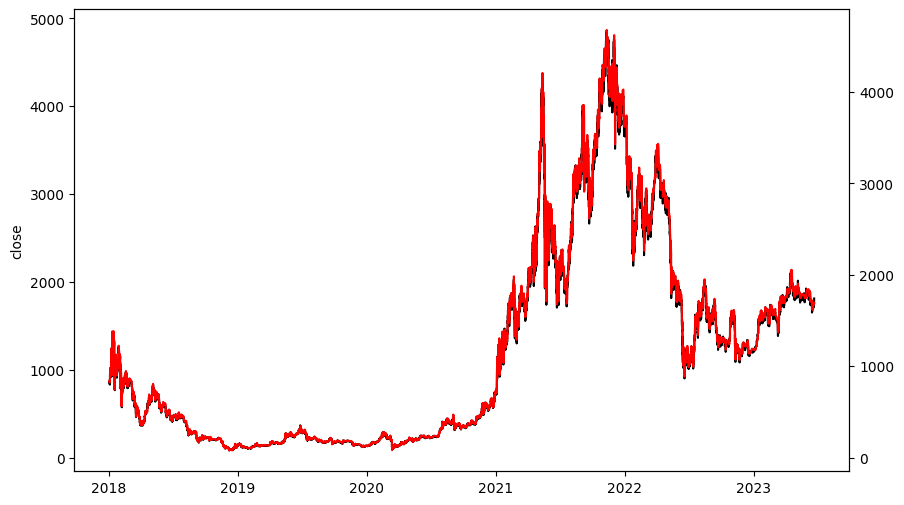

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(experiment.df.index, experiment.df.close, label='close', color='black')
plt.ylabel('close', color='black')
ax2 = plt.twinx()
plt.plot(experiment.df.index, experiment.df['BBL_5_2.0'], label='BBP_5_2.0', color = 'red')

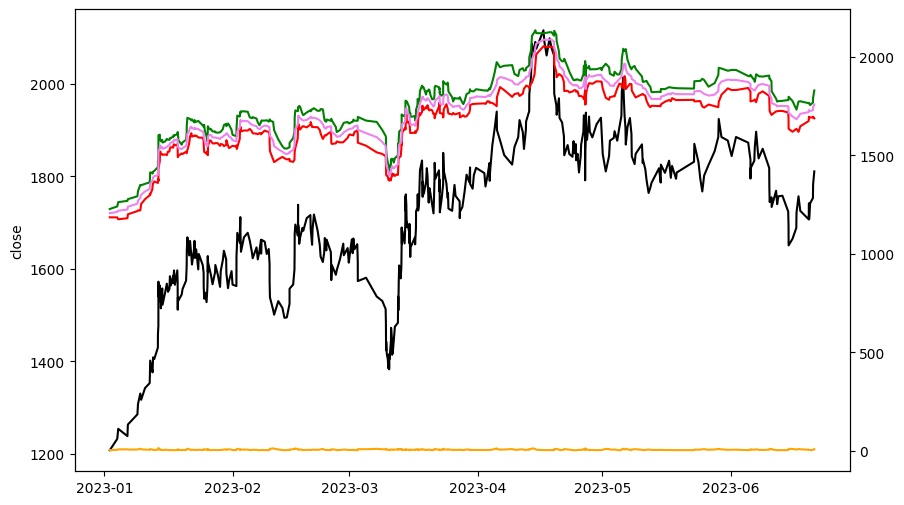

In [36]:
df2 = experiment.df.loc[experiment.df.index > '2023-01-01']
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2.close, label='close', color='black')
plt.ylabel('close', color='black')
ax2 = plt.twinx()
plt.plot(df2.index, df2['BBL_5_2.0'], label='BBP_5_2.0', color = 'red')
plt.plot(df2.index, df2['BBU_5_2.0'], label='BBU_5_2.0', color = 'green')
plt.plot(df2.index, df2['BBM_5_2.0'], label='BBM_5_2.0', color = 'violet')
plt.plot(df2.index, df2['BBB_5_2.0'], label='BBB_5_2.0', color = 'orange')

In [39]:
import pandas_ta as ta


In [40]:
df2.ta.obv(append=True)

datetime
2023-01-02 07:14:00    1138691.3067
2023-01-04 02:35:00    1596984.5116
2023-01-04 08:19:00    1756802.5245
2023-01-06 13:29:00    1106038.6373
2023-01-06 15:58:00    1202703.3932
                           ...     
2023-06-19 19:00:00    4998407.3617
2023-06-20 00:58:00    5052090.1486
2023-06-20 17:07:00    5201179.2845
2023-06-20 18:11:00    5253440.4303
2023-06-21 01:03:00    5401879.0212
Name: OBV, Length: 445, dtype: object

In [42]:
df2[['close', 'volume','OBV']]

,close,volume,OBV
datetime,,,
2023-01-02 07:14:00,1208.07,1.138691e+06,1138691.3067
2023-01-04 02:35:00,1232.8,4.582932e+05,1596984.5116
2023-01-04 08:19:00,1254.44,1.598180e+05,1756802.5245
2023-01-06 13:29:00,1238.63,6.507639e+05,1106038.6373
2023-01-06 15:58:00,1263.7,9.666476e+04,1202703.3932
...,...,...,...
2023-06-19 19:00:00,1707.39,4.426288e+04,4998407.3617
2023-06-20 00:58:00,1741.87,5.368279e+04,5052090.1486
2023-06-20 17:07:00,1753.47,1.490891e+05,5201179.2845


In [46]:
1.138691e+06 + 4.582932e+05	+1.598180e+05	- 6.507639e+05 +9.666476e+04

1202703.0599999998

In [47]:
5253440.4303/1202703.0599999998

4.368027824174656

In [48]:
df2[['close', 'roc_1']]

,close,roc_1
datetime,,
2023-01-02 07:14:00,1208.07,0.012717
2023-01-04 02:35:00,1232.8,0.020471
2023-01-04 08:19:00,1254.44,0.017554
2023-01-06 13:29:00,1238.63,-0.012603
2023-01-06 15:58:00,1263.7,0.02024
...,...,...
2023-06-19 19:00:00,1707.39,-0.019896
2023-06-20 00:58:00,1741.87,0.020195
2023-06-20 17:07:00,1753.47,0.00666


0.020470668090425193

In [57]:
df2['roc_5'] = df2['close'].shift(-5) / df2['close'] - 1
df2['roc_5'] = df2['roc_5'].shift(5)


In [58]:
df2.head(10)

,open,close,high,low,volume,y_pred,to_keep,SMA_5,EMA_5,VAR_5,...,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,OBV,roc_5
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-02 07:14:00,1192.62,1208.07,1208.46,1181.06,1.138691e+06,1,1,1206.816,1204.524814,138.00973,...,0.529836,0.012717,7,0,9.422609e-01,-0.334880,0.000000e+00,1.0,1138691.3067,None
2023-01-04 02:35:00,1208.08,1232.8,1234.5,1204.93,4.582932e+05,1,1,1213.296,1213.949876,244.02253,...,0.848983,0.020471,2,2,5.195840e-01,0.854419,8.660254e-01,-0.5,1596984.5116,None
2023-01-04 08:19:00,1232.81,1254.44,1254.96,1229.42,1.598180e+05,1,1,1219.278,1227.446584,590.94862,...,0.904291,0.017554,8,2,8.169699e-01,-0.576680,8.660254e-01,-0.5,1756802.5245,None
2023-01-06 13:29:00,1254.45,1238.63,1272.6,1237.98,6.507639e+05,1,1,1225.368,1231.174389,607.42207,...,0.650404,-0.012603,13,4,-3.984011e-01,-0.917211,-8.660254e-01,-0.5,1106038.6373,None
2023-01-06 15:58:00,1238.62,1263.7,1265.0,1236.0,9.666476e+04,1,1,1239.528,1242.016260,460.58287,...,0.814814,0.02024,15,4,-8.169699e-01,-0.576680,-8.660254e-01,-0.5,1202703.3932,None
2023-01-08 23:09:00,1263.71,1285.71,1290.03,1257.77,4.300018e+05,1,1,1255.056,1256.580840,444.97723,...,0.906175,0.017417,23,6,-2.449294e-16,1.000000,-2.449294e-16,1.0,1632705.2165,0.064268
2023-01-09 02:40:00,1285.71,1308.31,1310.0,1280.86,1.309840e+05,1,1,1270.158,1273.823893,745.05397,...,0.890678,0.017578,2,0,5.195840e-01,0.854419,0.000000e+00,1.0,1763689.2375,0.061251
2023-01-09 15:43:00,1308.32,1330.77,1333.34,1304.14,2.855834e+05,1,1,1285.424,1292.805929,1310.43028,...,0.850128,0.017167,15,0,-8.169699e-01,-0.576680,0.000000e+00,1.0,2049272.6512,0.060848
2023-01-09 20:52:00,1330.76,1317.22,1344.91,1316.42,1.515498e+05,1,1,1301.142,1300.943952,706.93767,...,0.669019,-0.010182,20,0,-7.308360e-01,0.682553,0.000000e+00,1.0,1897722.846,0.063449


In [59]:
1285.71/1208.07

1.0642677990513796